In [2]:
###IMPORT REQUIRED PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colormaps as cmaps
import os
from statistics import median_low

FIGURE 2: Sample B-Car Results

FIGURE 3: KNOCKOUTS

In [61]:
###READ IN KNOCKOUTS DATA
wt = 0.651

#Knockouts sweep
# sum_knockouts = pd.DataFrame()
# for f in os.listdir('F:/knockouts/'):
#     if len(os.listdir('F:/knockouts/'+f)) != 0:
#         sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
#         sum_k['k'] = f
#         sum_knockouts = pd.concat([sum_knockouts, sum_k])
# print("N = ", len(sum_knockouts))
# sum_knockouts = sum_knockouts.reset_index(drop=True)
# sum_knockouts['defect'] =[100*(1-(wt-sum_knockouts.delta_lam[i])/wt) for i in range(len(sum_knockouts))]

# #Select intermediate defects
# int_defects = sum_knockouts.loc[sum_knockouts.defect > 5]
# int_defects = int_defects.loc[int_defects.defect < 50]
# print('Number of intermediate defects: ', len(int_defects))

#Knockouts experiments - W sweep
knockouts = ["b1779", "b2277", "b2779", "b0432", "b0721", "b3919" ]
ws = ['1.0e-8', '1.0e-7', '5.0e-7', '1.0e-6']
w_sweep_knockouts = pd.DataFrame()
for f in knockouts:
    for w in ws:
        if len(os.listdir('F:/additional_knockouts/knockouts/'+f)) != 0:
            sum_k = pd.read_csv('F:/additional_knockouts/knockouts/'+f+'/sum_data_'+f+'_'+w+'.csv')
            sum_k['k'] = f
            sum_k['w'] = w
            #Compute peak B-car concentration, rise time from ODE data
            ode_k = pd.read_csv('F:/additional_knockouts/knockouts/'+f+'/sim_ode_data_'+f+'_'+w+'.csv')
            peak_bcar = ode_k.bcar.max()
            steady_state_bcar = ode_k.bcar[len(ode_k)-1]
            rise_time_index = np.where(ode_k.bcar >= steady_state_bcar*0.5)[0][0]
            rise_time_bcar = ode_k.time[rise_time_index]
            sum_k['rise_time'] = rise_time_bcar
            sum_k['peak_bcar'] = peak_bcar
            sum_k['run_N'] = len(ode_k)
            w_sweep_knockouts = pd.concat([w_sweep_knockouts, sum_k])

ws.append('WT')
for f in knockouts:
    if len(os.listdir('F:/knockouts/'+f)) != 0:
        sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
        sum_k['k'] = f
        sum_k['w'] = 'WT'
        #Compute peak B-car concentration, rise time from ODE data
        ode_k = pd.read_csv('F:/knockouts/'+f+'/sim_ode_data_'+f+'.csv')
        peak_bcar = ode_k.bcar.max()
        steady_state_bcar = ode_k.bcar[len(ode_k)-1]
        rise_time_index = np.where(ode_k.bcar >= steady_state_bcar*0.5)[0][0]
        rise_time_bcar = ode_k.time[rise_time_index]
        sum_k['rise_time'] = rise_time_bcar
        sum_k['peak_bcar'] = peak_bcar
        sum_k['run_N'] = len(ode_k)
        w_sweep_knockouts = pd.concat([w_sweep_knockouts, sum_k])

print("N =", len(w_sweep_knockouts))
#Compute percent defect from raw growth rates
w_sweep_knockouts = w_sweep_knockouts.reset_index(drop=True)
w_sweep_knockouts['defect'] =[100*(1-(wt-w_sweep_knockouts.delta_lam[i])/wt) for i in range(len(w_sweep_knockouts))]


N = 30


<Axes: xlabel='w', ylabel='k'>

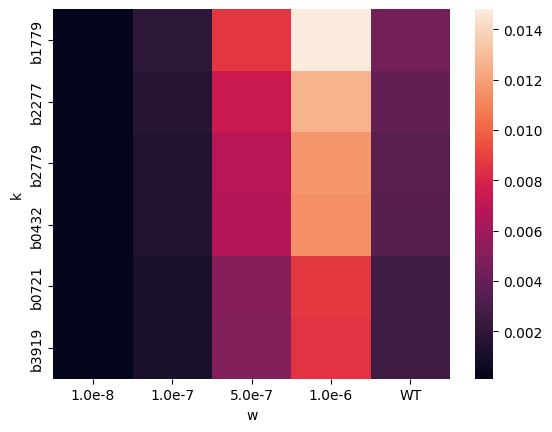

In [64]:
###FIGURE: Heatmap of W sweep experiment
defect_map = w_sweep_knockouts.pivot(index='k', columns='w', values='defect').reindex(knockouts).reindex(ws, axis=1)
rise_time_map = w_sweep_knockouts.pivot(index='k', columns='w', values='rise_time').reindex(knockouts).reindex(ws, axis=1)
peak_bcar_map = w_sweep_knockouts.pivot(index='k', columns='w', values='peak_bcar').reindex(knockouts).reindex(ws, axis=1)
sns.heatmap(peak_bcar_map)

FIGURE 4: BURDEN

In [44]:
### READ IN BURDEN DATA
#Read in summary data
sum_nc = pd.read_csv('F:/burden/beta_carotene/nc/sum_data_nc_feas.csv')
sum_ur = pd.read_csv('F:/burden/beta_carotene/ur/sum_data_ur_feas.csv')

# Generates median curves from raw simulation data - SLOW
# #Read in ODE data to get dynamics
# ode_ur = pd.read_csv('F:/burden/beta_carotene/ur/ode_data_ur_total.csv')
# ode_nc = pd.read_csv('F:/burden/beta_carotene/nc/ode_data_nc_total.csv')

# #Filter for feasibility
# sum_ur_feas = sum_ur.loc[sum_ur.feas == 1].reset_index(drop=True)
# print('Upstream Repression N = ', len(sum_ur_feas))
# sum_nc_feas = sum_nc.loc[sum_nc.feas == 1].reset_index(drop=True)
# print('No Control N = ', len(sum_nc_feas))

# ur_Ws = ode_ur.W.unique()
# nc_Ws = ode_nc.W.unique()
# ur_w2s = [float(ur_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(ur_Ws))]
# nc_w2s = [float(nc_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(nc_Ws))]

# ##Create lookup table between W and w2:
# lookup_ur = pd.DataFrame({'W':ur_Ws, 'w2':ur_w2s})
# lookup_nc = pd.DataFrame({'W':nc_Ws, 'w2':nc_w2s})

# #Find median product curve trajectory
# med_w2_ur = sum_ur_feas.loc[sum_ur_feas.bcar_tot == sum_ur_feas.bcar_tot.median()].reset_index(drop=True).w2.item()
# med_W_ur = lookup_ur.loc[lookup_ur.w2 == med_w2_ur].W.item()
# med_ode_ur = ode_ur.loc[ode_ur.W == med_W_ur]

# med_w2_nc = sum_nc_feas.loc[sum_nc_feas.bcar_tot == sum_nc_feas.bcar_tot.median()].reset_index(drop=True).w2.item()
# med_W_nc = lookup_nc.loc[lookup_nc.w2 == med_w2_nc].W.item()
# med_ode_nc = ode_nc.loc[ode_nc.W == med_W_nc]

# med_ode_nc.to_csv('F:/burden/beta_carotene/nc/median_ode.csv')
# med_ode_ur.to_csv('F:/burden/beta_carotene/ur/median_ode.csv')

#Read in median curves
med_ode_nc = pd.read_csv('F:/burden/beta_carotene/nc/median_ode.csv')
med_ode_ur = pd.read_csv('F:/burden/beta_carotene/ur/median_ode.csv')

Upstream Repression N =  719
No Control N =  1005


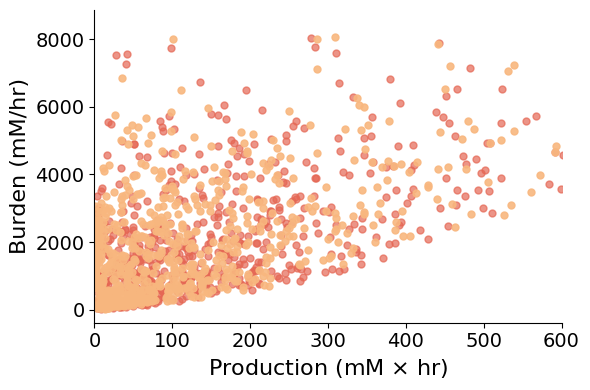

In [40]:
###FIGURE: Burden vs. production scatter plot
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel(r'Production (mM $\times$ hr)', fontsize=axislabelsize)
ax.set_ylabel('Burden (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 600])
ax.plot(sum_nc.bcar_tot, sum_nc.burden, '.', c=palette[5], ms=10, alpha=0.7, label='Open Loop')
ax.plot(sum_ur.bcar_tot, sum_ur.burden, '.', c=palette[2], ms=10, alpha=0.9, label='Upstream Repression')
fig.tight_layout()
# fig.savefig('../figs/bcar_burden_scatter.png', dpi=500)

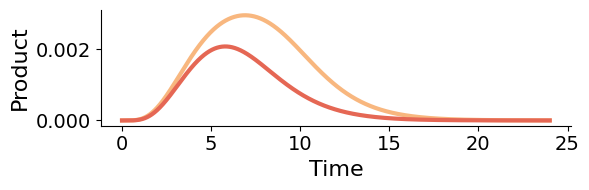

In [48]:
###FIGURE: Median product curves with confidence intervals
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16
fig, axs = plt.subplots(1, 1, figsize=(6, 2))

ax = axs
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlabel('Time', fontsize=axislabelsize)
ax.set_ylabel('Product', fontsize=axislabelsize)
ax.plot(med_ode_ur.time, med_ode_ur.bcar, color=palette[2], lw=3, label='Upstream\nRepression')
ax.plot(med_ode_nc.time, med_ode_nc.bcar, color=palette[5], lw=3, label='Open Loop')
fig.tight_layout()
#fig.savefig('../figs/bcar_product_curve.png', dpi=500)